In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [5]:
df = pd.read_csv('../data/xgb-data.csv')
df.head(15)

,ID,x1,x2,y
0,1,1,-5,0
1,2,2,5,0
2,3,3,-2,1
3,4,1,2,1
4,5,2,0,1
5,6,6,-5,1
6,7,7,5,1
7,8,6,-2,0
8,9,7,2,0
9,10,6,0,1


In [6]:
X = df[['x1','x2']]
y = df['y']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.4, random_state=0)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [7]:
param = {}
param['objective'] = 'binary:logitraw'
param['eta'] = 0.1
param['max_depth'] = 3
param['eval_metric'] = 'logloss'
param['silent'] = 1
param['nthread'] = 16

In [8]:
plst = list(param.items()) + [('eval_metric', 'ams@0.15')]
watchlist = [(dtrain, 'train')]
num_round = 10

# using log loss
bst = xgb.train(param, dtrain, num_round, watchlist)
# type(watchlist)
# param

[0]	train-logloss:9.46085
[1]	train-logloss:9.244
[2]	train-logloss:9.12278
[3]	train-logloss:9.04054
[4]	train-logloss:8.97956
[5]	train-logloss:8.93192
[6]	train-logloss:8.89342
[7]	train-logloss:8.86155
[8]	train-logloss:8.83468
[9]	train-logloss:8.81171


In [9]:
y_pred = bst.predict(dtest)
y_pred

array([0.17439026, 0.        , 0.        , 0.17439026, 0.        ,
       0.17439026], dtype=float32)

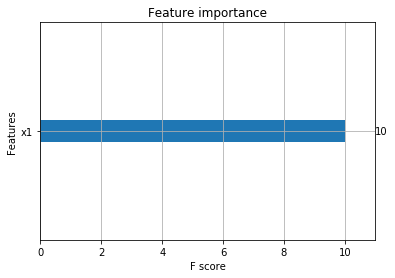

In [10]:
xgb.plot_importance(bst)

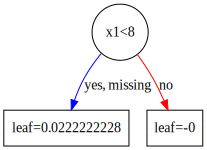

In [11]:
# xgb.plot_tree(bst)
xgb.to_graphviz(bst)

In [12]:
# R1 = {X|X[j] <= c}

NameError: name 'j' is not defined